In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

youtube_data = pd.read_csv('../clean_data/youtube_data_clean.csv')
categories = pd.read_csv('../clean_data/category_id_data_clean.csv')


# Exploring the Data

Here I will do some analysis of the data and look for some correlations or trends in the data that would be useful to someone looking optimise their YouTube performance.

### Popular Catergories:
Youtube classifies videos by a category_id. If you were a new youtube looking for a nieche that performed well you would want to know the top categories. Taking the mean view count of each category is a fair way to determine which category gets the highest average views.

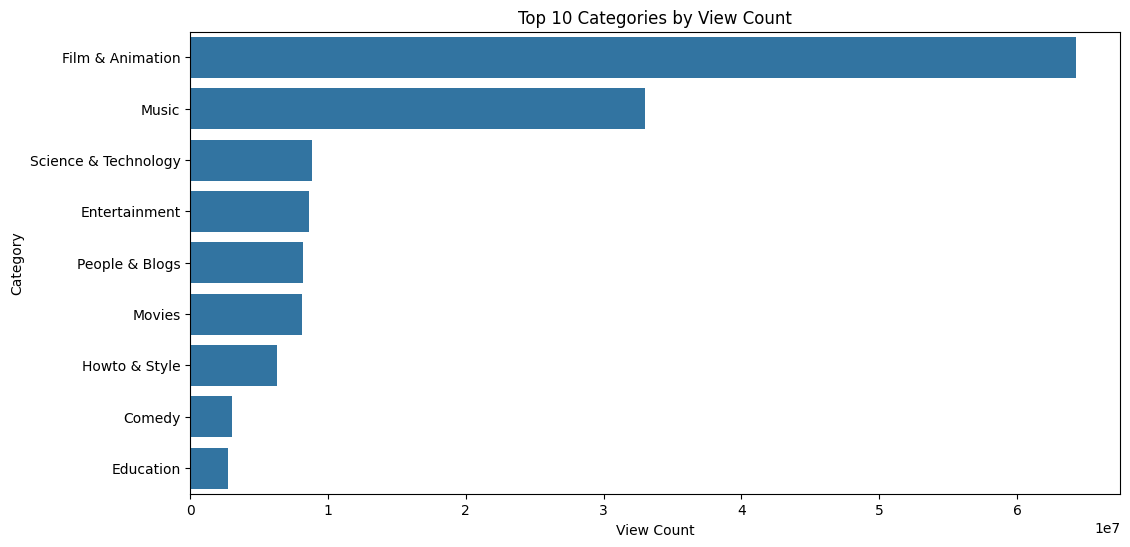

In [2]:
popular_categories = youtube_data.groupby('category_id').mean('view_count').reset_index()
popular_categories = popular_categories.merge(categories, on='category_id', how='left')
plt.figure(figsize=(12,6))
plt.title('Top 10 Categories by View Count')
sns.barplot(data=popular_categories.sort_values('view_count', ascending=False).head(10), x='view_count', y='title')
plt.xlabel('View Count')
plt.ylabel('Category')
plt.show()
plt.close()


As you can clearly see, the top categories are Film & Animation, Music and Science & Technology. We could then isolate videos in these categories and analyse other qualities such as average video duration or like_count vs view_count.

## Optimal Upload Day:

some days of the week are morelikely to get more views than others. Finding out the best days of the week to upload could be critical to gaining more views via organic growth when your YouTube following is small.

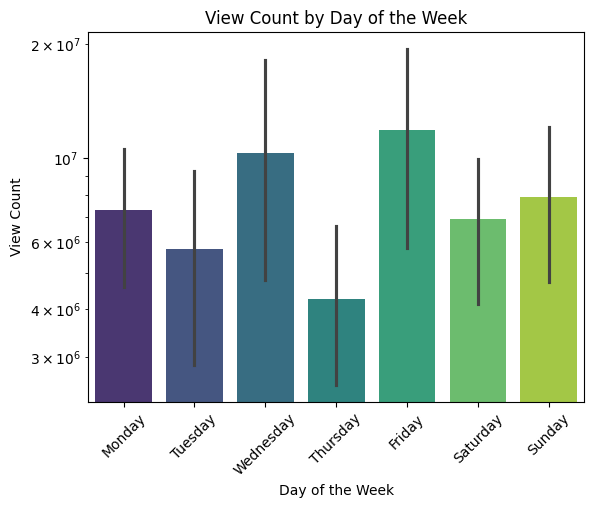

In [3]:
# Making days of the week cartegorical and ordered
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = pd.CategoricalDtype(categories=days_of_week, ordered=True)
youtube_data['published_day'] = youtube_data['published_day'].astype(cat_type)

# Plotting view count by day of the week
barplot = sns.barplot(x = 'published_day', y = 'view_count', data = youtube_data, palette='viridis')
plt.title('View Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('View Count')
barplot.set(yscale='log')
plt.xticks(rotation=45)
plt.show()
plt.close()


This barplot shows that Fridays and Wednesdays are the best days of the week for views. Now that we know this we could figure out the best time of day to upload the videos by mapping total view count over the published time. To prevent the upcoming comparisons from being too convoluted, I will only focus on upload times for Wednesdays and Fridays.

In [4]:
fridays_wednesdays = youtube_data[youtube_data['published_day'].isin(['Friday', 'Wednesday'])]


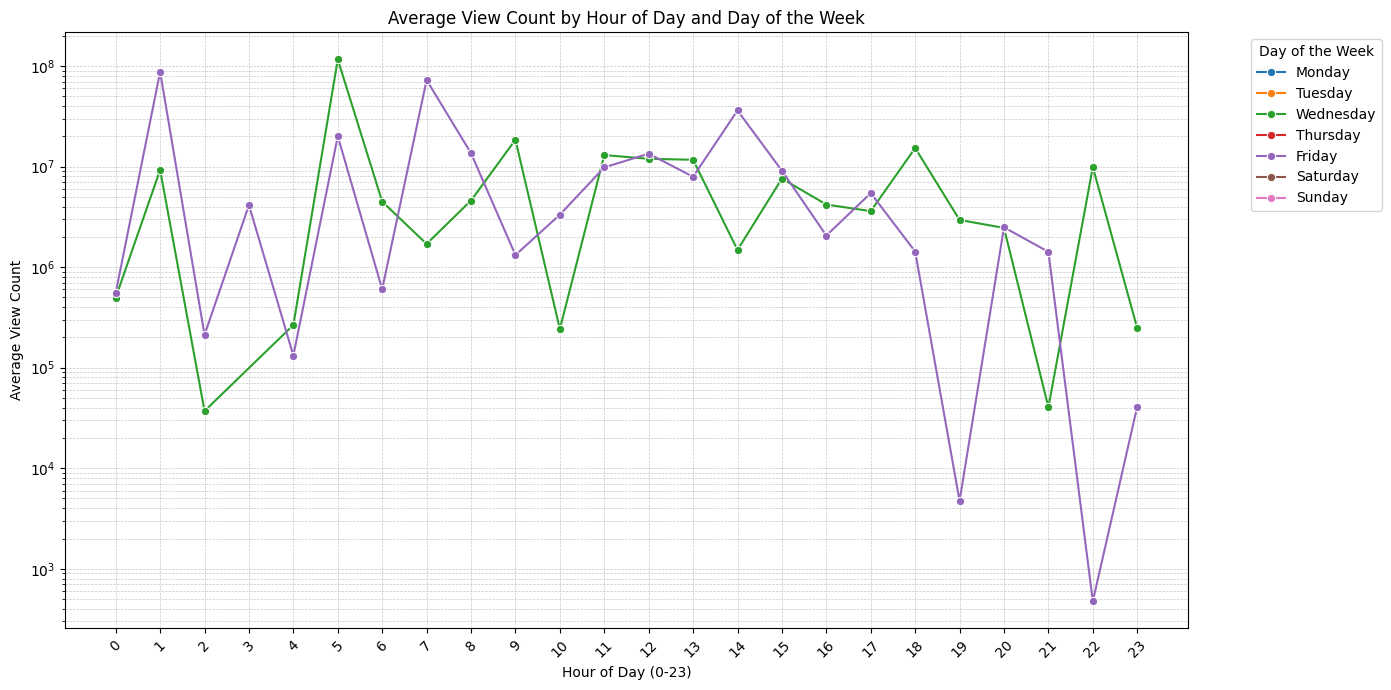

In [5]:
fridays_wednesdays['published_hour'] = pd.to_datetime(youtube_data['published_time'], errors='coerce',format='%H:%M:%S').dt.hour

# Aggregate view counts by hour and day
hourly_views = fridays_wednesdays.groupby(['published_hour', 'published_day'], observed=False)['view_count'].mean().reset_index()

plt.figure(figsize=(14, 7))
palette = sns.color_palette('tab10', n_colors=7)
lineplot = sns.lineplot(
    data=hourly_views,
    x='published_hour',
    y='view_count',
    hue='published_day',
    marker='o',
    palette=palette
)
plt.title('Average View Count by Hour of Day and Day of the Week')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average View Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
lineplot.set(yscale='log')
plt.xticks(ticks=range(0, 24), labels=[str(h) for h in range(0, 24)], rotation=45)
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()


Now that we know the fictional Youtube channel should focus on Film & Animation and that it should be uploading either on a Friday or a Wednesday at sometime before mid-day (the earlier the better it seems!) I feel as though we should look some other comparisons such as video engagement and video duration.

## Video Engagement:

one important metric you see a lot of content creators talk about is engagement with their content. So lets look at engagement across the categories so we can see what kind of input the viewers of our new Film & Animation channel would have. 

For this I will compare like_count as a percentage of view_count; I won't include comment_count as it could be a fair assumption that someone who comments would also like the video and as I have no way of eliminating potential double engagements I won't include them.

In [6]:
video_engagement = pd.DataFrame()

video_engagement = youtube_data[youtube_data['category_id'].isin([1,10])]
video_engagement['engagement_rate %'] = (video_engagement['like_count'] / video_engagement['view_count']) * 100 # Engagement rate as a percentage.
video_engagement = video_engagement.groupby('category_id').mean('engagement_rate').reset_index()
video_engagement.head()
                                

,category_id,duration_minutes,view_count,like_count,comment_count,engagement_rate %
0,1,11.717500,6.426066e+07,566955.500000,1733.250000,1.493260
1,10,8.331429,3.297006e+07,174705.757741,4436.428571,45.943288


As you can see by this small table Film & Animation only get an average engagement rate of 1.5% compare that to the engagement rate of the next best performing category, Music, with an engagement rate of 45.9%. This table also gives the average duration of a video of each category. Music videos are several minutes shorter on average and get a much higher engagement rate.